# Comparing actual and maxent correlations

Having trained independent and pairwise maxent models on averages and pairwise correlations in neural data, we want to see how well they predict higher-order correlations which they are not constrained to reproduce. Here, we focus on the population count distribution $p(K)$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [54]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams["font.size"] = 12

## N = 10

In [29]:
pks = np.loadtxt("../results/correlations/stimulus_10_pks.csv", delimiter=",", dtype=float)
ind_pks = np.loadtxt("../results/correlations/stimulus_10_ind_pks.csv", delimiter=",", dtype=float)
ising_pks = np.loadtxt("../results/correlations/stimulus_10_ising_pks.csv", delimiter=",", dtype=float)

In [30]:
pks.shape, ind_pks.shape, ising_pks.shape

((11, 10), (11, 10), (11, 10))

Plotting the predicted distributions for the independent, pairwise and experimental data for different subsets. By change `rep`, one can look at the plots of difference subsets

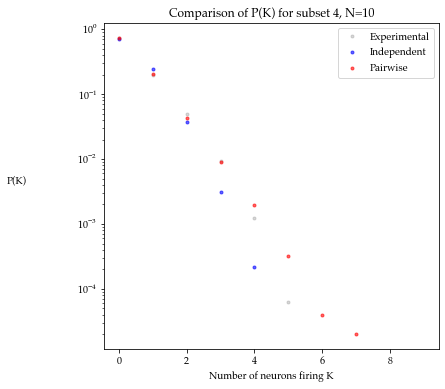

In [41]:
rep = 4
plt.figure(figsize=(6,6))
top_K = 10 # should return first 
Ks = np.arange(top_K)
plt.plot(Ks,pks[:top_K,rep],'.',color="gray",alpha=0.3)
plt.plot(Ks,ind_pks[:top_K,rep],".",color="blue",alpha=0.6)
plt.plot(Ks,ising_pks[:top_K,rep],".",color="red",alpha=0.6)
plt.legend(['Experimental', 'Independent', 'Pairwise'])
plt.yscale('log')
plt.xlabel("Number of neurons firing K")
plt.ylabel("P(K)",rotation=0,labelpad=60)
plt.title(f"Comparison of P(K) for subset {rep}, N=10")
plt.show()

We want to explore how the results over all the subsets change with K. To summarise the results graphically, we look at the five number summary. We write code below that allows us to extract and plot this.

In [32]:
def five_sum(data):
    quartiles = np.percentile(data, [25,50,75],axis=1)
    mins = np.min(data, axis=1)
    low_qs = quartiles[0]
    meds = quartiles[1]
    upp_qs = quartiles[2]
    maxs = np.max(data, axis=1)
    return mins, low_qs, meds, upp_qs, maxs

In our graphical representation of the five number summary, median trajectories are represented as `-` with the distances between the upper quartile and maximum and the minimum and lower quartile illustrated as veritical lines `|`.

In [33]:
def plot_quartiles(data, color="black", top_K=None):
    if top_K == None:
        top_K = data.shape[0]
    mins, low_qs, meds, upp_qs, maxs = five_sum(data[:top_K])
    low_diffs = low_qs - mins # from min to lower quartile
    upp_diffs = maxs - upp_qs # from upper quartile to max
    Ks = np.arange(top_K)
    # plot upper quartile
    plt.errorbar(Ks, upp_qs, yerr=np.stack(( np.zeros(top_K), upp_diffs )), #yerr is (below error, above error)
                 fmt="none",ecolor=color,elinewidth=0.8)
    # plot median
    plt.plot(Ks, meds, "_", color=color)
    # plot upper quartile
    plt.errorbar(Ks, low_qs, yerr=np.stack(( low_diffs, np.zeros(top_K) )), #yerr is (below error, above error)
                 fmt="none",ecolor=color,elinewidth=0.8)

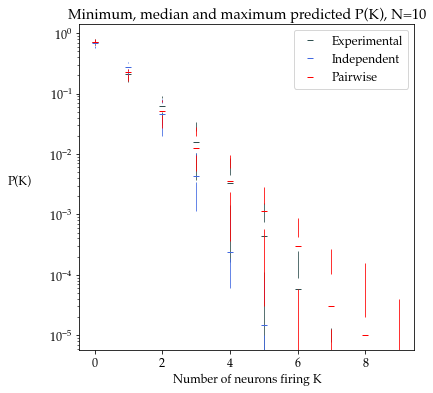

In [34]:
plt.figure(figsize=(6,6))
top_ind = 10 
top_exp = 10 
top_pair = 10
plot_quartiles(pks[:top_exp],'darkslategrey')
plot_quartiles(ind_pks[:top_ind], 'royalblue')
plot_quartiles(ising_pks[:top_pair], 'red')
plt.legend(['Experimental', 'Independent', 'Pairwise'])
plt.yscale('log')
plt.xlabel("Number of neurons firing K")
plt.ylabel("P(K)",rotation=0,labelpad=30)
plt.title("Minimum, median and maximum predicted P(K), N=10")
plt.show()

Alternatively, we could just plot the average over the 10 subsets at each $K$.

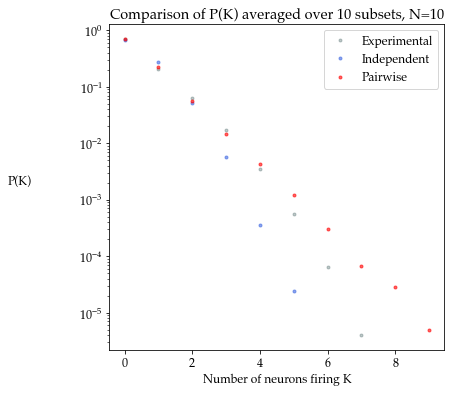

In [35]:
plt.figure(figsize=(6,6))
top_K = 10 # should return first 
Ks = np.arange(top_K)
plt.plot(Ks,np.mean(pks[:top_K],axis=1),'.',color="darkslategrey",alpha=0.3)
plt.plot(Ks,np.mean(ind_pks[:top_K],axis=1),".",color="royalblue",alpha=0.6)
plt.plot(Ks,np.mean(ising_pks[:top_K],axis=1),".",color="red",alpha=0.6)
plt.legend(['Experimental', 'Independent', 'Pairwise'])
plt.yscale('log')
plt.xlabel("Number of neurons firing K")
plt.ylabel("P(K)",rotation=0,labelpad=60)
plt.title("Comparison of P(K) averaged over 10 subsets, N=10")
plt.show()

## N = 40

In [63]:
pks = np.loadtxt("../results/correlations/stimulus_40_pks.csv", delimiter=",", dtype=float)
ind_pks = np.loadtxt("../results/correlations/stimulus_40_ind_pks.csv", delimiter=",", dtype=float)
ising_pks = np.loadtxt("../results/correlations/stimulus_40_ising_pks.csv", delimiter=",", dtype=float)

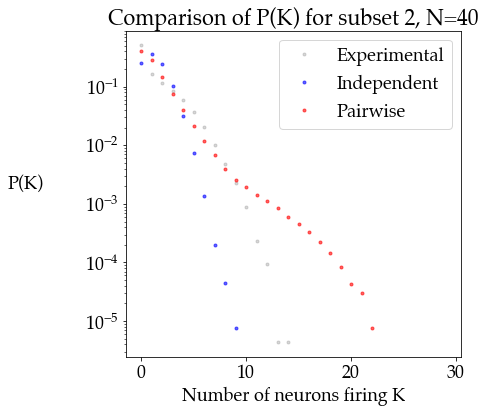

In [64]:
rep = 2
plt.figure(figsize=(6,6))
top_K = 30 # should return first 
Ks = np.arange(top_K)
plt.plot(Ks,pks[:top_K,rep],'.',color="gray",alpha=0.3)
plt.plot(Ks,ind_pks[:top_K,rep],".",color="blue",alpha=0.6)
plt.plot(Ks,ising_pks[:top_K,rep],".",color="red",alpha=0.6)
plt.legend(['Experimental', 'Independent', 'Pairwise'])
plt.yscale('log')
plt.xlabel("Number of neurons firing K")
plt.ylabel("P(K)",rotation=0,labelpad=60)
plt.title(f"Comparison of P(K) for subset {rep}, N=40")
plt.show()

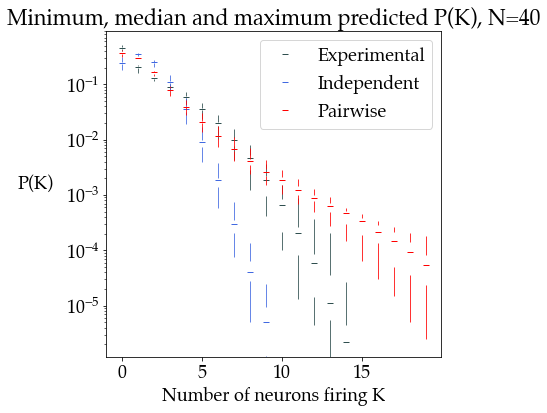

In [65]:
plt.figure(figsize=(6,6))
top_ind = 10 
top_exp = 15 
top_pair = 20
plot_quartiles(pks[:top_exp],'darkslategrey')
plot_quartiles(ind_pks[:top_ind], 'royalblue')
plot_quartiles(ising_pks[:top_pair], 'red')
plt.legend(['Experimental', 'Independent', 'Pairwise'])
plt.yscale('log')
plt.xlabel("Number of neurons firing K")
plt.ylabel("P(K)",rotation=0,labelpad=30)
plt.title("Minimum, median and maximum predicted P(K), N=40")
plt.show()

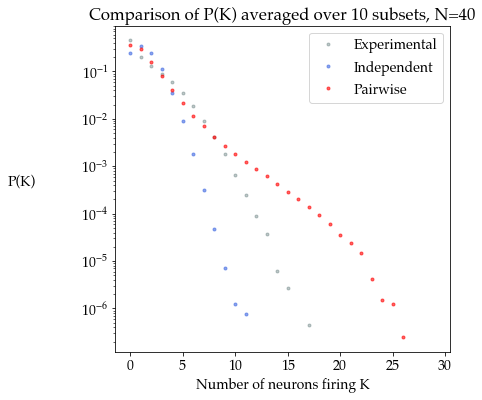

In [10]:
plt.figure(figsize=(6,6))
top_K = 30 # should return first 
Ks = np.arange(top_K)
plt.plot(Ks,np.mean(pks[:top_K],axis=1),'.',color="darkslategrey",alpha=0.3)
plt.plot(Ks,np.mean(ind_pks[:top_K],axis=1),".",color="royalblue",alpha=0.6)
plt.plot(Ks,np.mean(ising_pks[:top_K],axis=1),".",color="red",alpha=0.6)
plt.legend(['Experimental', 'Independent', 'Pairwise'])
plt.yscale('log')
plt.xlabel("Number of neurons firing K")
plt.ylabel("P(K)",rotation=0,labelpad=60)
plt.title("Comparison of P(K) averaged over 10 subsets, N=40")
plt.show()

## N = 100

In [81]:
pks = np.loadtxt("../results/correlations/stimulus_100_pks.csv", delimiter=",", dtype=float)
ind_pks = np.loadtxt("../results/correlations/stimulus_100_ind_pks.csv", delimiter=",", dtype=float)
ising_pks = np.loadtxt("../results/correlations/stimulus_100_ising_pks.csv", delimiter=",", dtype=float)

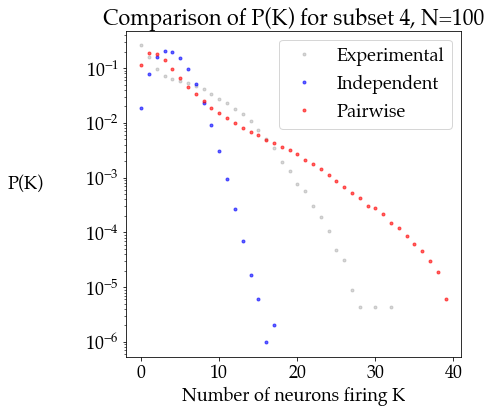

In [82]:
rep = 4
plt.figure(figsize=(6,6))
top_K = 40 # should return first 
Ks = np.arange(top_K)
plt.plot(Ks,pks[:top_K,rep],'.',color="gray",alpha=0.3)
plt.plot(Ks,ind_pks[:top_K,rep],".",color="blue",alpha=0.6)
plt.plot(Ks,ising_pks[:top_K,rep],".",color="red",alpha=0.6)
plt.legend(['Experimental', 'Independent', 'Pairwise'])
plt.yscale('log')
plt.xlabel("Number of neurons firing K")
plt.ylabel("P(K)",rotation=0,labelpad=60)
plt.title(f"Comparison of P(K) for subset {rep}, N=100")
plt.show()

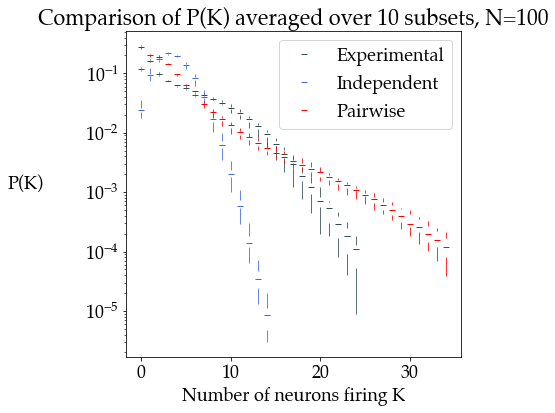

In [83]:
plt.figure(figsize=(6,6))
top_ind = 15 
top_exp = 25 
top_pair = 35

Ks = np.arange(top_K)
plot_quartiles(pks[:top_exp],'darkslategrey')
plot_quartiles(ind_pks[:top_ind], 'royalblue')
plot_quartiles(ising_pks[:top_pair], 'red')
plt.legend(['Experimental', 'Independent', 'Pairwise'])
plt.yscale('log')
plt.xlabel("Number of neurons firing K")
plt.ylabel("P(K)",rotation=0,labelpad=60)
plt.title("Comparison of P(K) averaged over 10 subsets, N=100")
plt.show()

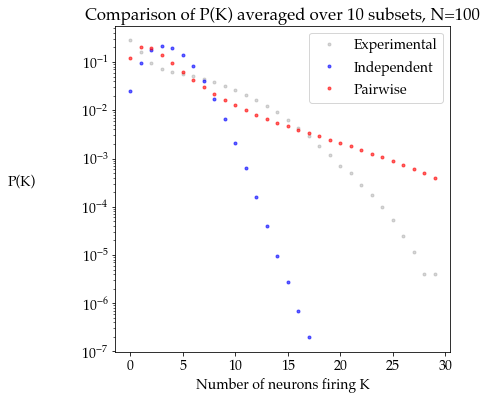

In [14]:
plt.figure(figsize=(6,6))
top_K = 30 # should return first 
Ks = np.arange(top_K)
plt.plot(Ks,np.mean(pks[:top_K],axis=1),'.',color="gray",alpha=0.3)
plt.plot(Ks,np.mean(ind_pks[:top_K],axis=1),".",color="blue",alpha=0.6)
plt.plot(Ks,np.mean(ising_pks[:top_K],axis=1),".",color="red",alpha=0.6)
plt.legend(['Experimental', 'Independent', 'Pairwise'])
plt.yscale('log')
plt.xlabel("Number of neurons firing K")
plt.ylabel("P(K)",rotation=0,labelpad=60)
plt.title("Comparison of P(K) averaged over 10 subsets, N=100")
plt.show()

## N = 10-25
We go from 10 to 25 and plot the difference between the experimental data and the independent and pairwise predictions $P(K)_{\text{indep/pairwise}} - P(K)_{exp}$ for each $K$.

In [13]:
def load_pks(N):
    pks = np.loadtxt(f"../results/correlations/stimulus_{N}_pks.csv", delimiter=",", dtype=float)
    ind_pks = np.loadtxt(f"../results/correlations/stimulus_{N}_ind_pks.csv", delimiter=",", dtype=float)
    ising_pks = np.loadtxt(f"../results/correlations/stimulus_{N}_ising_pks.csv", delimiter=",", dtype=float)
    return pks, ind_pks, ising_pks

In [14]:
pks, ind_pks, ising_pks = load_pks(40)

In [15]:
def get_trunc_pks(pks,top_K):
    top_K = np.min((pks.shape[0],top_K))
    Ks = np.arange(top_K)
    return pks[:top_K], Ks

In [16]:
pks_trunc, Ks_trunc = get_trunc_pks(pks,50)
pks_trunc.shape, Ks_trunc.shape

((41, 10), (41,))

### Difference between the independent model and experimental data

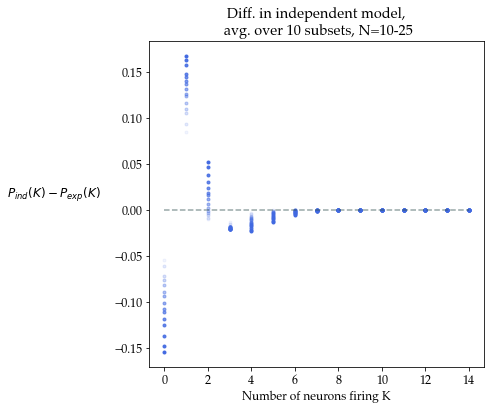

In [40]:
Ns = np.arange(10,26) # redefine this to be 10-20
trunc = 15 # truncate the Ks at this number
plt.figure(figsize=(6,6))

for N in Ns[-1::-1]:
    pks, ind_pks, _ = load_pks(N)
    dff_ks, Ks = get_trunc_pks( ind_pks - pks, trunc)  # when this is positive, model over predicts and negative - under-predicts
    alpha =  (N - np.min(Ns))/(np.max(Ns)-np.min(Ns) )
    plt.plot(Ks,np.mean(dff_ks,axis=1),'.',color="royalblue", alpha=alpha)
    plt.xlabel("Number of neurons firing K")
    plt.ylabel("$P_{ind}(K)-P_{exp}(K)$",rotation=0,labelpad=60)
    plt.title(f"Diff. in independent model,\n avg. over 10 subsets, N={Ns[0]}-{Ns[-1]}")
top_x = round(plt.xlim()[1])
plt.plot(np.arange(top_x), np.zeros(top_x),"--",color="darkslategrey",alpha=0.5)
plt.show()

### Relative differences
The deviations from the experimental data seem smaller as K increases. However, the probability P(K) becomes smaller and smaller for large K. It makes sense to look at the relative differences. First we make a static plot where we change the intensity of the colour as the number of neurons increase, then we do a video for increasing N.

In [26]:
def get_relative_diffs(exp,model):
    """
        Calculates the average difference between experimental and model data and 
        divides it by the average of the mean value between the experimental and model values mean( (exp + model) /2).
        Where this average is 0, which would result in a division by zero, we truncate the series.
        This quantity is -2 when either we predict the experimental data to be 0, when it is in fact non-zero,
        and +2 when the experiemental data is 0, but we predict it to be non-zero.
    """
    mean_denom = np.mean( (model + exp ) / 2, axis= 1)
    cutoff = np.argmin(mean_denom)
    mean_diffs = np.mean( model[:cutoff] - exp[:cutoff] , axis=1)
    rel_diffs = mean_diffs / mean_denom[:cutoff]
    return rel_diffs, cutoff

(-2.128565439284248, 0.6998742249692084)


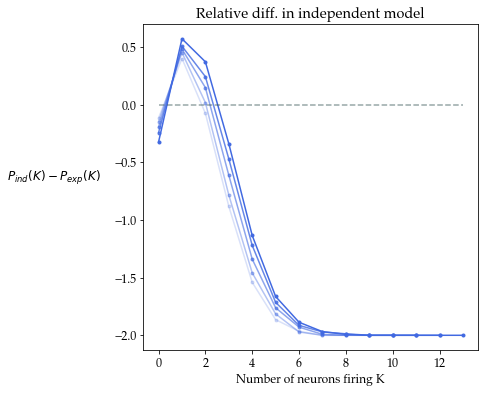

In [38]:
Ns = list(range(10,26,3))
# Ns = Ns + [40,100]
plt.figure(figsize=(6,6))

for N in Ns[-1::-1]:
    pks, ind_pks, _ = load_pks(N)
    rel_diffs, cutoff = get_relative_diffs(pks, ind_pks)
    # when this is positive, model over predicts and negative - under-predicts
    alpha =  (N - np.min(Ns))/(np.max(Ns)-np.min(Ns) )
    plt.plot(np.arange(cutoff),rel_diffs,'.-',color="royalblue", alpha=alpha)
    plt.xlabel("Number of neurons firing K")
    plt.ylabel("$P_{ind}(K)-P_{exp}(K)$",rotation=0,labelpad=60)
    plt.title(f"Relative diff. in independent model")
print(plt.ylim())
top_x = round(plt.xlim()[1])
plt.plot(np.arange(top_x), np.zeros(top_x),"--",color="darkslategrey",alpha=0.5)
plt.show()

## As gifs:

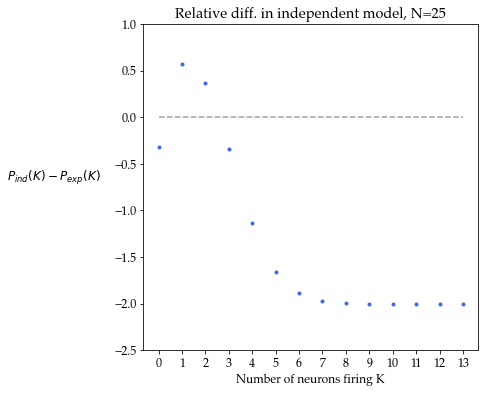

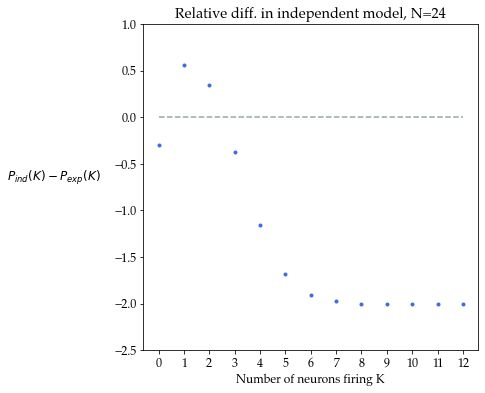

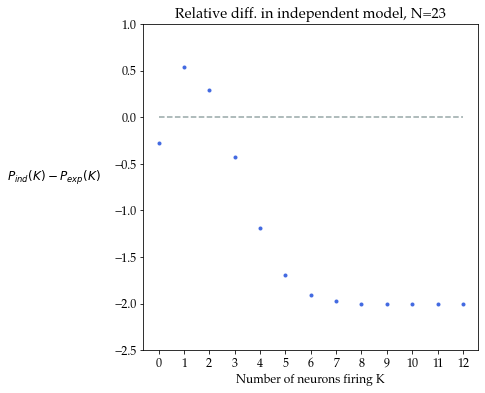

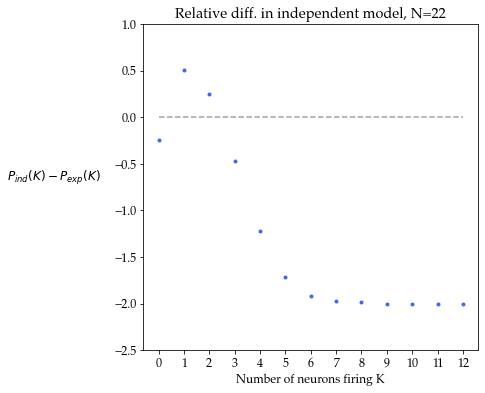

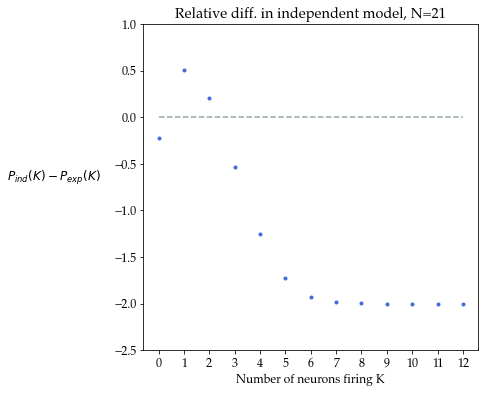

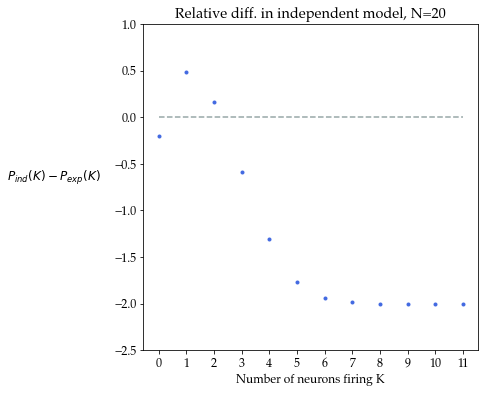

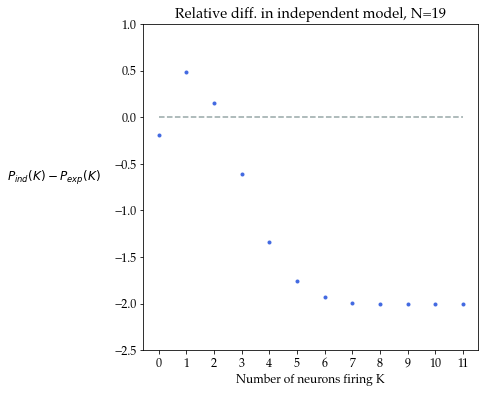

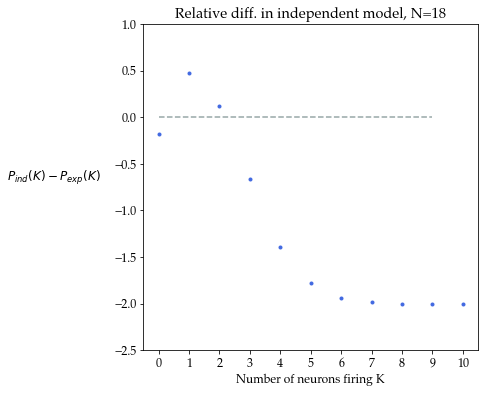

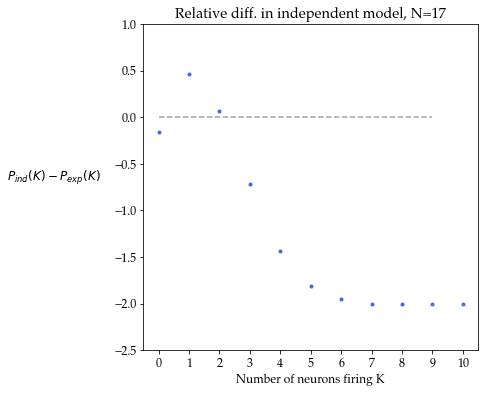

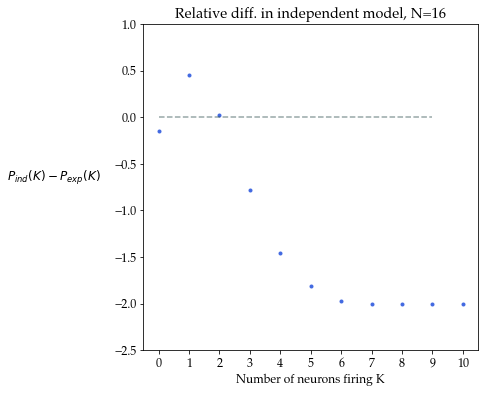

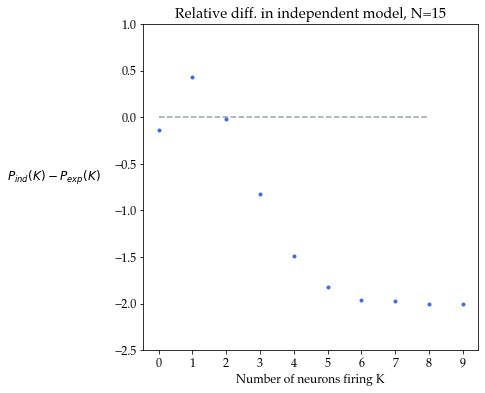

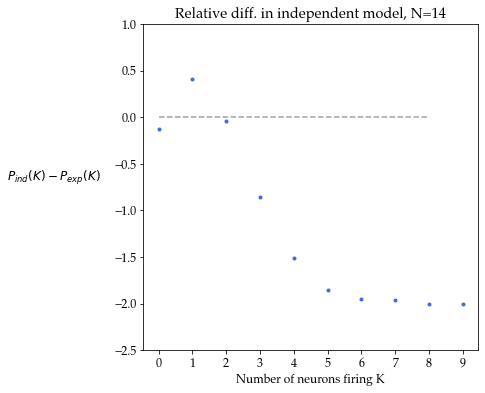

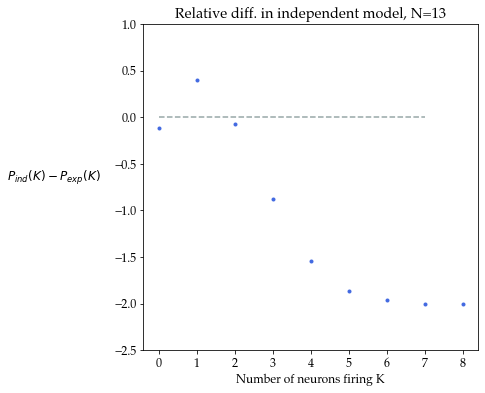

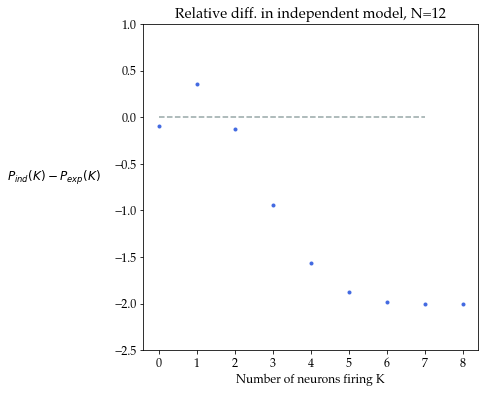

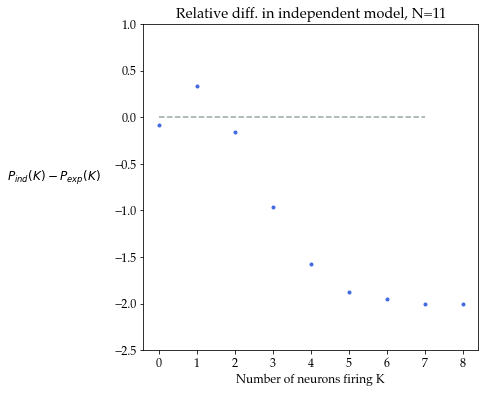

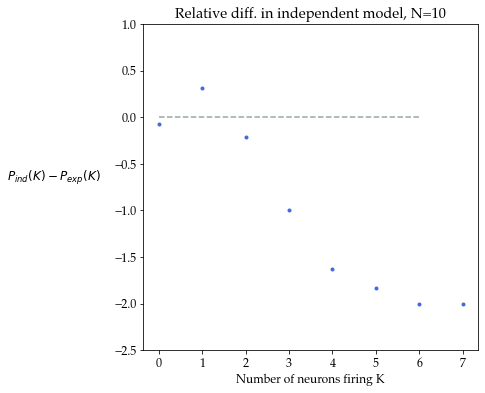

In [39]:
Ns = np.arange(10,26) # redefine this to be 10-20

for N in Ns[-1::-1]:
    plt.figure(figsize=(6,6))
    plt.ylim((-2.5,1))
    pks, ind_pks, _ = load_pks(N)
    rel_diffs, cutoff = get_relative_diffs(pks, ind_pks)
    # when this is positive, model over predicts and negative - under-predicts
    plt.xticks(np.arange(N+1))
    plt.plot(np.arange(cutoff),rel_diffs,'.',color="royalblue")
    plt.xlabel("Number of neurons firing K")
    plt.ylabel("$P_{ind}(K)-P_{exp}(K)$",rotation=0,labelpad=60)
    plt.title(f"Relative diff. in independent model, N={N}")
    top_x = round(plt.xlim()[1])
    plt.plot(np.arange(top_x), np.zeros(top_x),"--",color="darkslategrey",alpha=0.5)
    # save to /Users/abramschonfeldt/Desktop/Masters/maxent/results/corr_plots 
    plt.savefig(f"../results/corr_plots/indep{N}.jpg")
    plt.show()

### Difference between the pairwise model and experimental data

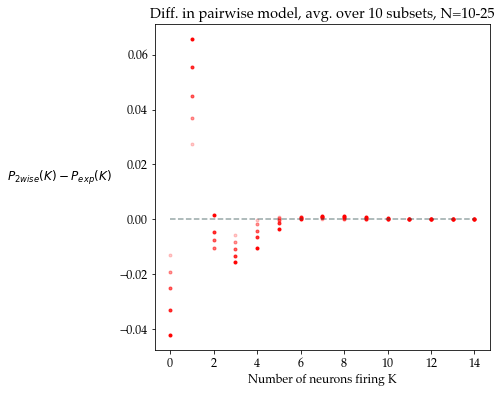

In [41]:
Ns = np.arange(10,26,3) 
trunc = 15 # truncate the Ks at this number
plt.figure(figsize=(6,6))

for N in Ns[-1::-1]:
    pks, _, ising_pks = load_pks(N)
    dff_ks, Ks = get_trunc_pks(ising_pks - pks, trunc)  # when this is positive, model over predicts and negative - under-predicts
    alpha =  (N - np.min(Ns))/(np.max(Ns)-np.min(Ns) )
    plt.plot(Ks,np.mean(dff_ks,axis=1),'.',color="red", alpha=alpha)
    plt.xlabel("Number of neurons firing K")
    plt.ylabel("$P_{2wise}(K)-P_{exp}(K)$",rotation=0,labelpad=60)
    plt.title(f"Diff. in pairwise model, avg. over 10 subsets, N={Ns[0]}-{Ns[-1]}")
top_x = round(plt.xlim()[1])
plt.plot(np.arange(top_x), np.zeros(top_x),"--",color="darkslategrey",alpha=0.5)
plt.show()

Relative differences

(-0.48970357802484765, 2.1185573132392785)


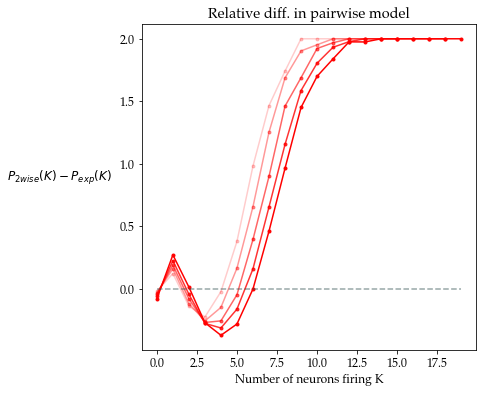

In [42]:
Ns = list(range(10,26,3))
# Ns = Ns + [40,100]
plt.figure(figsize=(6,6))

for N in Ns[-1::-1]:
    pks, _, ising_pks = load_pks(N)
    rel_diffs, cutoff = get_relative_diffs(pks, ising_pks)    
    alpha =  (N - np.min(Ns))/(np.max(Ns)-np.min(Ns) )
    plt.plot(np.arange(cutoff),rel_diffs,'.-',color="red", alpha=alpha)
    plt.xlabel("Number of neurons firing K")
    plt.ylabel("$P_{2wise}(K)-P_{exp}(K)$",rotation=0,labelpad=60)
    plt.title(f"Relative diff. in pairwise model")
print(plt.ylim())
top_x = round(plt.xlim()[1])
plt.plot(np.arange(top_x), np.zeros(top_x),"--",color="darkslategrey",alpha=0.5)
plt.show()

As gifs:

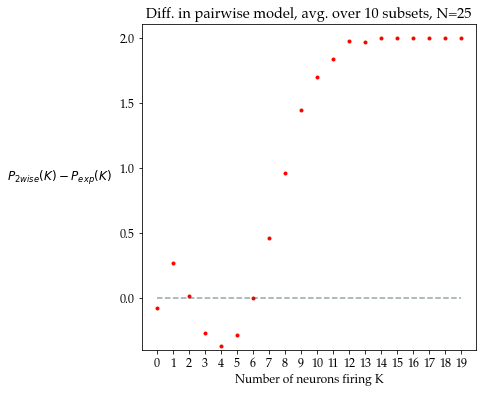

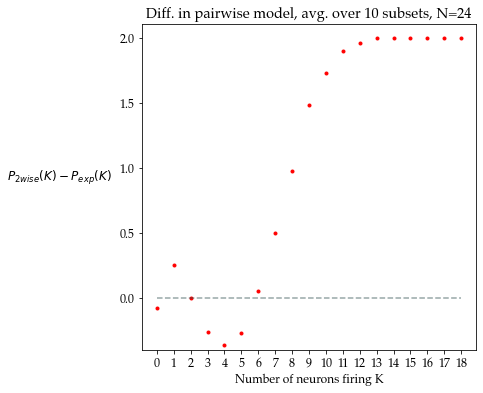

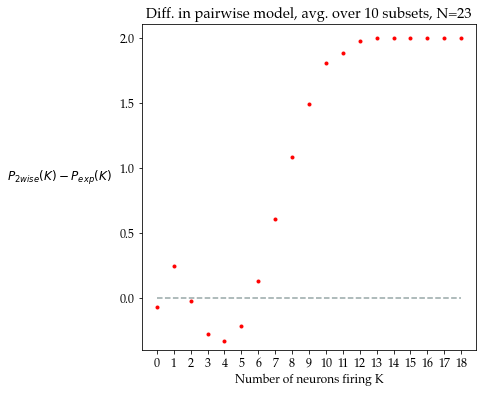

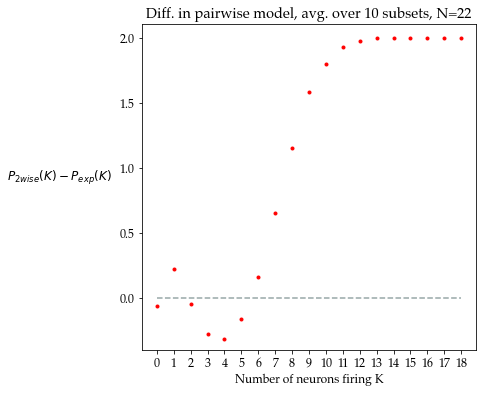

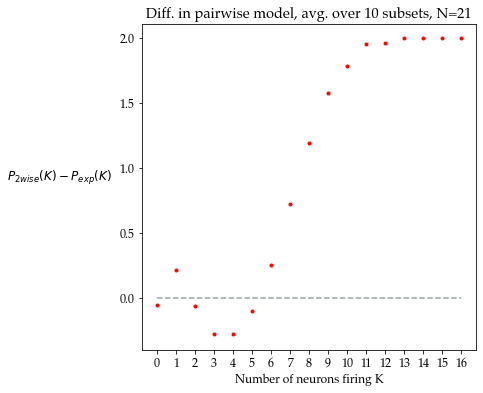

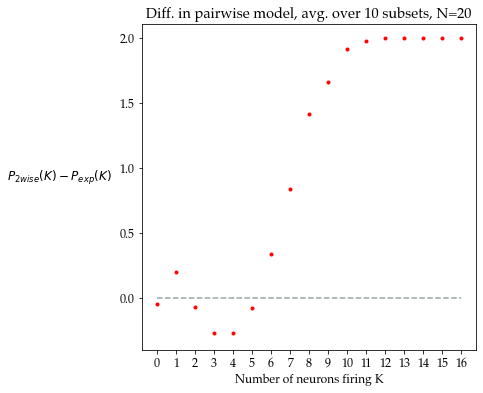

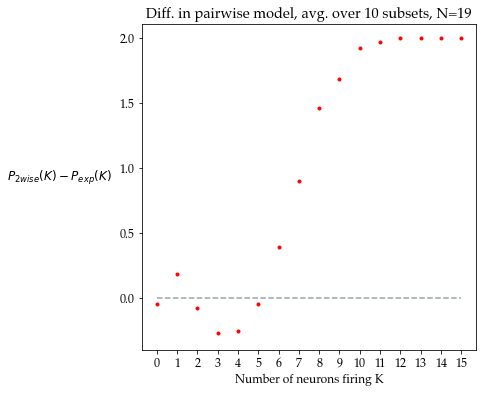

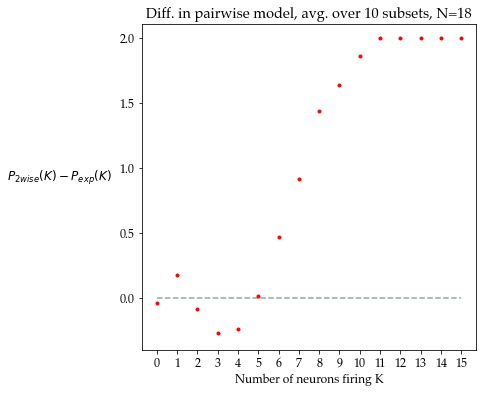

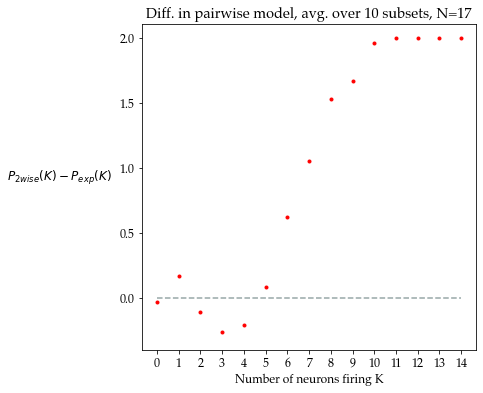

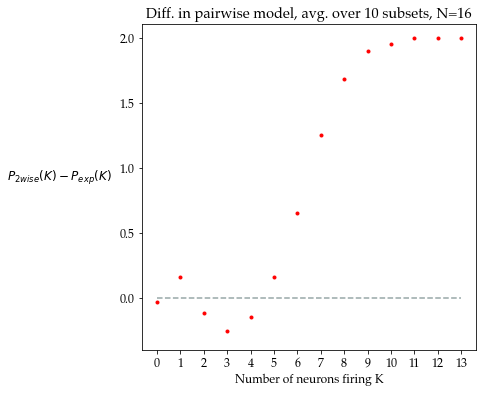

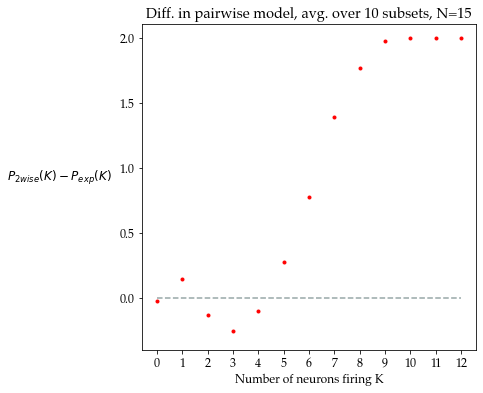

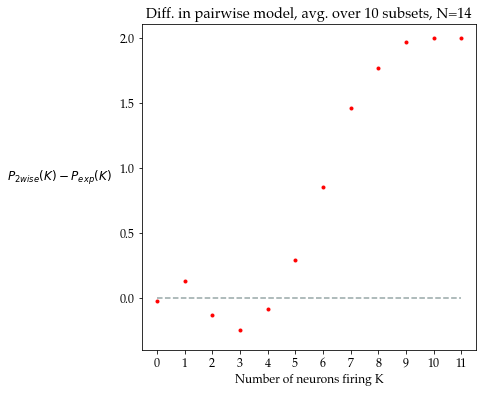

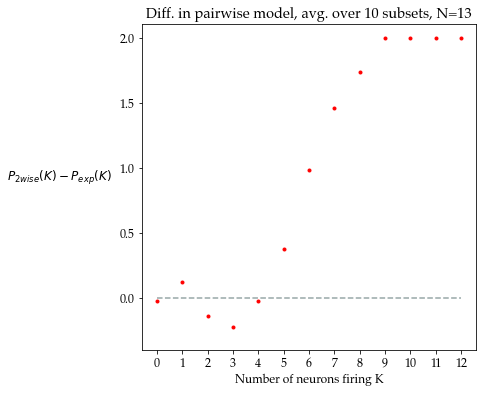

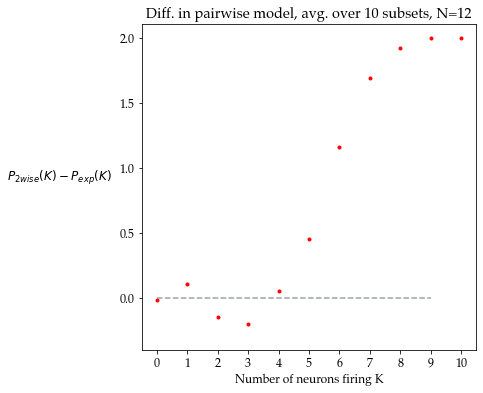

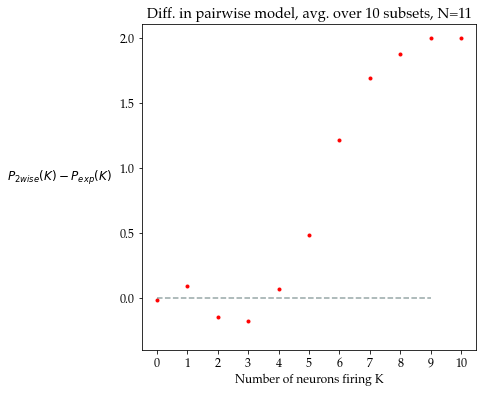

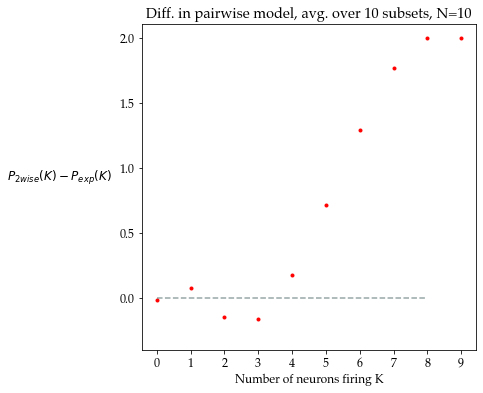

In [47]:
Ns = np.arange(10,26) 

for N in Ns[-1::-1]:
    plt.figure(figsize=(6,6))
    plt.ylim((-0.4,2.11))
    pks, _, ising_pks = load_pks(N)
    rel_diffs, cutoff = get_relative_diffs(pks, ising_pks)
    # when this is positive, model over predicts and negative - under-predicts
    plt.xticks(np.arange(N+1))
    plt.plot(np.arange(cutoff),rel_diffs,'.',color="red")
    plt.xlabel("Number of neurons firing K")
    plt.ylabel("$P_{2wise}(K)-P_{exp}(K)$",rotation=0,labelpad=60)
    plt.title(f"Diff. in pairwise model, avg. over 10 subsets, N={N}")
    top_x = round(plt.xlim()[1])
    plt.plot(np.arange(top_x), np.zeros(top_x),"--",color="darkslategrey",alpha=0.5)
    # save to /Users/abramschonfeldt/Desktop/Masters/maxent/results/corr_plots 
    plt.savefig(f"../results/corr_plots/pairwise{N}.jpg")
    plt.show()
    

### Combining the two

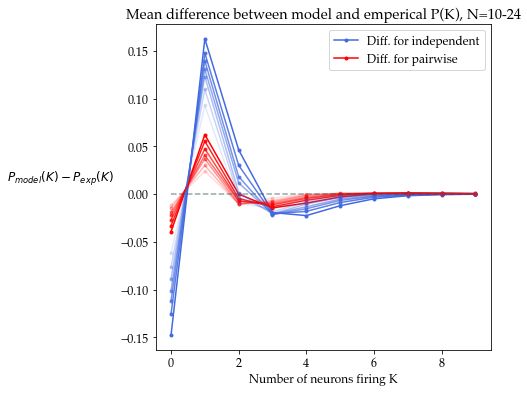

In [20]:
Ns = np.arange(10,25,2) # redefine this to be 10-20
trunc = 10 # truncate the Ks at this number
plt.figure(figsize=(6,6))

for N in Ns[-1::-1]:
    pks, indep_pks, ising_pks = load_pks(N)
    dff_indep_ks, Ks = get_trunc_pks(indep_pks - pks, trunc) 
    dff_ising_ks, Ks = get_trunc_pks(ising_pks - pks, trunc) 
    alpha =  (N - np.min(Ns))/(np.max(Ns)-np.min(Ns) )
    plt.plot(Ks,np.mean(dff_indep_ks,axis=1),'.-',color="royalblue", alpha=alpha)
    plt.plot(Ks,np.mean(dff_ising_ks,axis=1),'.-',color="red", alpha=alpha)
    plt.xlabel("Number of neurons firing K")
    plt.ylabel("$P_{model}(K)-P_{exp}(K)$",rotation=0,labelpad=60)
    plt.title(f"Mean difference between model and emperical P(K), N={Ns[0]}-{Ns[-1]}")
plt.legend(['Diff. for independent', 'Diff. for pairwise'])
plt.plot(np.arange(trunc), np.zeros(trunc),"--",color="darkslategrey",alpha=0.5)
plt.show()